In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
TRESHOLD_DISTANCE = 4.5
df = pd.read_csv("data/CoilData.csv")
#df

In [114]:
#Reading Seperate CSV files

dfb4 = "data/SignalExport/400442B4.csv"
dfb5 = "data/SignalExport/400442B5.csv"


def read_single_csv(filename):

    with open(filename) as f:
        data = f.read()

    #Split values in lengthpoints & values
    data = data.split(":;")[1].split("Values")
    length = data[0].split(";")
    width = data[1].split(";")

    #Remove empty values & turn data into floats instead of strings
    length = [x for x in length if x]
    length = [float(x) for x in length]
    width = [x for x in width if x]
    width = [float(x) for x in width]


    #Put the data into a dataframe
    df = pd.DataFrame()
    df['length'] = length
    df['width'] = width


    #Remove leading zeros & cut off first measurements 
    df = (df[df['width'] != 0])
    df = df[(df['length'] >= 45) ]
    return df


In [115]:
b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)

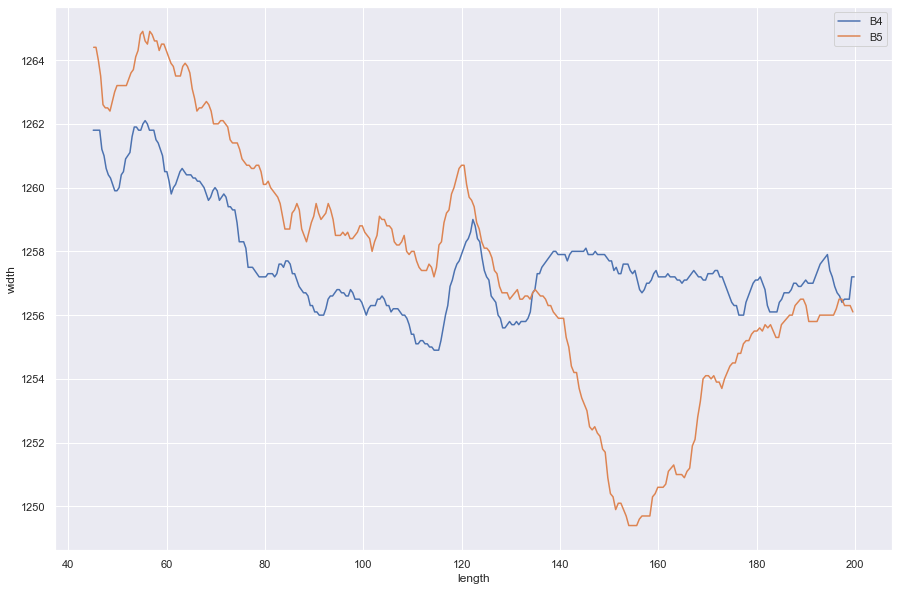

In [122]:
#Plot Data 
sns.set(rc={'figure.figsize':(15,10)})
plt.figure()
sns.lineplot(data=b4,x='length',y='width',label='B4')
g = sns.lineplot(data=b5,x='length',y='width',label='B5')
#g.axhline(b4.quantile(.1).width,c='r')

<Figure size 1080x720 with 0 Axes>

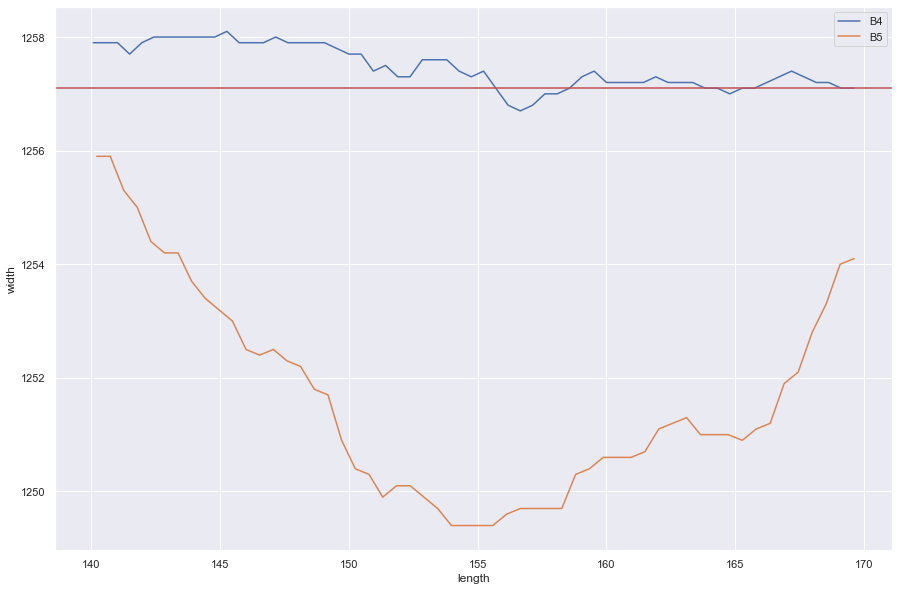

In [120]:
plt.figure()
_b4 = b4[(b4['length'] >= 140) & (b4['length'] <= 170)]
_b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
plt.figure()
treshold = _b4.quantile(.1).width
sns.lineplot(data=_b4,x='length',y='width',label='B4')
g = sns.lineplot(data=_b5,x='length',y='width',label='B5')
g.axhline(treshold,c='r')
#_b4.describe()
#print(b4)
#print(b5)

In [118]:
TRESHOLD_DISTANCE = 4.5
def calculate_constriction(treshold,treshold_distance,b5):
    b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
    b5 = b5.copy()

    b5['dif'] = b5.apply(lambda x: treshold - x.width, axis=1)
    b5['treshold_exceeded'] = b5.apply(lambda x: (x.dif >= treshold_distance),axis=1)
    
    print(b5)
    print(b5.treshold_exceeded.value_counts())
    

calculate_constriction(treshold,TRESHOLD_DISTANCE,b5)   

       length   width  dif  treshold_exceeded
335  140.2059  1255.9  1.2              False
336  140.7319  1255.9  1.2              False
337  141.2581  1255.3  1.8              False
338  141.7845  1255.0  2.1              False
339  142.3113  1254.4  2.7              False
340  142.8385  1254.2  2.9              False
341  143.3661  1254.2  2.9              False
342  143.8937  1253.7  3.4              False
343  144.4216  1253.4  3.7              False
344  144.9500  1253.2  3.9              False
345  145.4787  1253.0  4.1              False
346  146.0078  1252.5  4.6               True
347  146.5372  1252.4  4.7               True
348  147.0670  1252.5  4.6               True
349  147.5974  1252.3  4.8               True
350  148.1279  1252.2  4.9               True
351  148.6587  1251.8  5.3               True
352  149.1900  1251.7  5.4               True
353  149.7216  1250.9  6.2               True
354  150.2537  1250.4  6.7               True
355  150.7860  1250.3  6.8        